# Bioinformatics Project - Computational Drug Discovery - Influenza virus A matrix protein M2  
Michael Bahchevanov  
***

## Exploratory Data Analysis 📊  
This notebook will be performing a few fundamental calculations, starting with calculating the *Lipinski descriptors*. Followed by that, we will be performing a *Chemical Space Analysis* via the *Lipinski descriptors*. Finally, we will be performing statistical analysis via the *Mann-Whitney U Test* for rejecting the null hypothesis.

### 1. What is the Lipinski Rule of 5  
This process evaluates the **druglikeness** of compounds based on the **ADME** acronym (*Absorption, Distribution, Metabolism and Excretion*), also known as the **pharmacokinetic profile**. [<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4910824/">Reference</a>]  <br>
The *Lipinski rule of 5* for an orally active drug has no more than one violation of the following criteria:
* Hydrogen bond donors < 5  
* Hydrogen bond acceptors < 10  
* Molecular mass < 500 dalton  
* Octanol-water partition coefficient (log P) < 5  
<img src="assets/Lipinski_Rule_of_5.png">

### 2. Installing libraries and tooling 🔧  
We need to install *rdkit*, an open-source cheminformatics toolkit.

In [1]:
!conda install -c rdkit rdkit -y

Solving environment: done

# All requested packages already installed.



### 3. Loading bioactivity data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/influenza_virus_A_matrix_M2_protein_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4287824,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccccc1F,2900.0,intermediate
1,CHEMBL4277167,N#CCCN(Cc1cccs1)S(=O)(=O)c1cccc(F)c1,160.0,active
2,CHEMBL4284419,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(F)cc1,140.0,active
3,CHEMBL4292316,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Cl)cc1,670.0,active
4,CHEMBL4294990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,420.0,active
5,CHEMBL4286741,Cc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,560.0,active
6,CHEMBL4285916,COc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,7730.0,intermediate
7,CHEMBL4277990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C#N)cc1,8.0,active
8,CHEMBL4282531,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C(F)(F)F)cc1,7210.0,intermediate
9,CHEMBL4293132,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc([N+](=O)[O-])cc1,10530.0,inactive


### 4. Calculate Lipinski Descriptors

Now we will be using the *rdkit* tooling to calculate the *Lipinski descriptors*.

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [5]:
def lipinski_descriptors(smiles):
    molecule_data = [Chem.MolFromSmiles(element) for element in smiles]
    
    baseData = np.arange(1,1)
    
    for i, mol in enumerate(molecule_data):
        # molecular mass
        desc_MolWt = Descriptors.MolWt(mol)
        # octanol-water partition coefficient
        desc_MolLogP = Descriptors.MolLogP(mol)
        # number of hydrogen donors
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        # number of hydrogen acceptors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        
        # handle first entry in the vector
        if i==0:
            baseData = row
        # stack all the other rows on the base data
        else:
            baseData = np.vstack([baseData, row])
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski_descriptors(df['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,324.402,2.99178,0.0,4.0
1,324.402,2.99178,0.0,4.0
2,324.402,2.99178,0.0,4.0
3,340.857,3.50608,0.0,4.0
4,385.308,3.61518,0.0,4.0
5,320.439,3.16110,0.0,4.0
6,336.438,2.86128,0.0,5.0
7,331.422,2.72436,0.0,5.0
8,374.409,3.87148,0.0,4.0
9,351.409,2.76088,0.0,6.0


### 5. Combining bioactivity data with the Lipinski descriptors data

In [7]:
df = pd.concat([df, df_lipinski], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4287824,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccccc1F,2900.0,intermediate,324.402,2.99178,0.0,4.0
1,CHEMBL4277167,N#CCCN(Cc1cccs1)S(=O)(=O)c1cccc(F)c1,160.0,active,324.402,2.99178,0.0,4.0
2,CHEMBL4284419,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(F)cc1,140.0,active,324.402,2.99178,0.0,4.0
3,CHEMBL4292316,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Cl)cc1,670.0,active,340.857,3.50608,0.0,4.0
4,CHEMBL4294990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,420.0,active,385.308,3.61518,0.0,4.0
5,CHEMBL4286741,Cc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,560.0,active,320.439,3.16110,0.0,4.0
6,CHEMBL4285916,COc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,7730.0,intermediate,336.438,2.86128,0.0,5.0
7,CHEMBL4277990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C#N)cc1,8.0,active,331.422,2.72436,0.0,5.0
8,CHEMBL4282531,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C(F)(F)F)cc1,7210.0,intermediate,374.409,3.87148,0.0,4.0
9,CHEMBL4293132,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc([N+](=O)[O-])cc1,10530.0,inactive,351.409,2.76088,0.0,6.0


### 6. Converting EC50 to pEC50

Now we are going to work with the *agonist* (a drug that binds to a receptor inside a cell/on its surface) **EC50** and convert it to **pEC50** which is the negative logarithmic scale which is **-log$_{10}$(EC50)**. This transformation would allow our data to be more uniformly distributed. The intuition behind this is e.g., when working with **pH** we have come to perceive it as a scale from **1** to **2** to **3** not **10 mM** to **20 mM** to **30 mM**. [<a href="https://www.collaborativedrug.com/why-using-pic50-instead-of-ic50-will-change-your-life/">Reference</a>]

Before we can create our function, we will be looking if there are values **> 100,000,000**. As they would become negative, that why we are going to set them a cap. 

In [8]:
def normalize_values(row):
    if row > 100_000_000:
        return 100_000_000
    else:
        return row

In [9]:
df['standard_value'] = df['standard_value'].apply(normalize_values)
df

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4287824,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccccc1F,2900.0,intermediate,324.402,2.99178,0.0,4.0
1,CHEMBL4277167,N#CCCN(Cc1cccs1)S(=O)(=O)c1cccc(F)c1,160.0,active,324.402,2.99178,0.0,4.0
2,CHEMBL4284419,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(F)cc1,140.0,active,324.402,2.99178,0.0,4.0
3,CHEMBL4292316,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Cl)cc1,670.0,active,340.857,3.50608,0.0,4.0
4,CHEMBL4294990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,420.0,active,385.308,3.61518,0.0,4.0
5,CHEMBL4286741,Cc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,560.0,active,320.439,3.16110,0.0,4.0
6,CHEMBL4285916,COc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,7730.0,intermediate,336.438,2.86128,0.0,5.0
7,CHEMBL4277990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C#N)cc1,8.0,active,331.422,2.72436,0.0,5.0
8,CHEMBL4282531,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C(F)(F)F)cc1,7210.0,intermediate,374.409,3.87148,0.0,4.0
9,CHEMBL4293132,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc([N+](=O)[O-])cc1,10530.0,inactive,351.409,2.76088,0.0,6.0


Now we will be creating a function that would take the *standard_value* and transform it to its **-log$_{10}$** counterpart.

In [10]:
def convert_to_pEC50(row):
    return -np.log10(row * (10 ** -9))

In [11]:
df['pEC50'] = df['standard_value'].apply(convert_to_pEC50)
df = df.drop(['standard_value'], axis=1)
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL4287824,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccccc1F,intermediate,324.402,2.99178,0.0,4.0,5.537602
1,CHEMBL4277167,N#CCCN(Cc1cccs1)S(=O)(=O)c1cccc(F)c1,active,324.402,2.99178,0.0,4.0,6.795880
2,CHEMBL4284419,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(F)cc1,active,324.402,2.99178,0.0,4.0,6.853872
3,CHEMBL4292316,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Cl)cc1,active,340.857,3.50608,0.0,4.0,6.173925
4,CHEMBL4294990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,active,385.308,3.61518,0.0,4.0,6.376751
5,CHEMBL4286741,Cc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,active,320.439,3.16110,0.0,4.0,6.251812
6,CHEMBL4285916,COc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,intermediate,336.438,2.86128,0.0,5.0,5.111821
7,CHEMBL4277990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C#N)cc1,active,331.422,2.72436,0.0,5.0,8.096910
8,CHEMBL4282531,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C(F)(F)F)cc1,intermediate,374.409,3.87148,0.0,4.0,5.142065
9,CHEMBL4293132,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc([N+](=O)[O-])cc1,inactive,351.409,2.76088,0.0,6.0,4.977572


Now, we will be saving the file to a *.csv* format for further use.

In [12]:
df.to_csv('./data/influenza_virus_A_matrix_M2_protein_04_bioactivity_data_3class_pEC50.csv', index=False)

### 7. Filtering the "intermediate" bioactivity class

As this class denotes bioactive compounds that do not have a strong activatory response nor a weak one, they will not be necessary in our further research. This is why we will be removing them from our data.

In [13]:
df = df[df['class'] != 'intermediate']
print(df.shape)
df

(28, 8)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pEC50
1,CHEMBL4277167,N#CCCN(Cc1cccs1)S(=O)(=O)c1cccc(F)c1,active,324.402,2.99178,0.0,4.0,6.795880
2,CHEMBL4284419,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(F)cc1,active,324.402,2.99178,0.0,4.0,6.853872
3,CHEMBL4292316,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Cl)cc1,active,340.857,3.50608,0.0,4.0,6.173925
4,CHEMBL4294990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,active,385.308,3.61518,0.0,4.0,6.376751
5,CHEMBL4286741,Cc1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,active,320.439,3.16110,0.0,4.0,6.251812
7,CHEMBL4277990,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc(C#N)cc1,active,331.422,2.72436,0.0,5.0,8.096910
9,CHEMBL4293132,N#CCCN(Cc1cccs1)S(=O)(=O)c1ccc([N+](=O)[O-])cc1,inactive,351.409,2.76088,0.0,6.0,4.977572
10,CHEMBL4292737,CC(=O)c1ccc(S(=O)(=O)N(CCC#N)Cc2cccs2)cc1,inactive,348.449,3.05528,0.0,5.0,4.395990
13,CHEMBL4281445,CCCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,active,374.325,4.11150,0.0,3.0,6.431798
15,CHEMBL4291678,O=C(O)CCN(Cc1cccs1)S(=O)(=O)c1ccc(Br)cc1,inactive,404.307,3.17620,1.0,4.0,3.973222


Now, we will be saving the data into a *.csv* file.

In [14]:
df.to_csv('./data/influenza_virus_A_matrix_M2_protein_05_bioactivity_data_2class_pEC50.csv')

***  
### 8. Chemical Space Analysis (Exploratory Data Analysis) via the Lipinski descriptors

We will be installing *seaborn* and *matplotlib* for data visualization.

In [15]:
!pip install seaborn
!pip install matplotlib

In [16]:
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

#### 8.1 Frequency plot of the bioactive classes

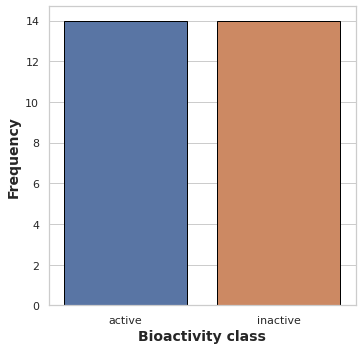

In [17]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('./plots/bioactivity_class_plot.pdf')

We can see that we have an equal amount of **active** and **inactive** classes in our data.

#### 8.2 Scatter plot of the Molecular Weight (MW) versus the Partition Coefficient (LogP)

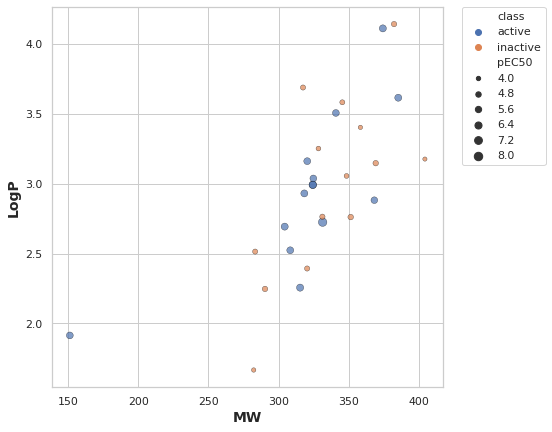

In [18]:
plt.figure(figsize=(7, 7))

sns.scatterplot(x='MW', y='LogP', data=df, hue='class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('./plots/MW_vs_LogP_plot.pdf')

We do not have that many data points which is going to be a problem later when modelling.

This plot makes sense since we have normalized and classified the values from the initial data.

### 9. Statistical Analysis via the Mann-Whitney U Test  
The **Mann-Whitney U Test** is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution. [<a href="https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/">Reference</a>]

As we will be using computational statistics, we will be installing the *scipy* library

In [19]:
!pip install scipy

In [20]:
def mannwhitney(df, descriptor):
    from scipy.stats import mannwhitneyu
    
    np.random.seed(42)
    
    # get active and inactive classes
    active = df[df['class'] == 'active'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]
    
    # perform test on bioactivity classes
    stat, p = mannwhitneyu(active, inactive)
    
    # interpret test results
    alpha = 0.05
    if p > alpha:
        interpret = 'Same distribution (fail to reject H0)'
    else:
        interpret = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistics': stat,
                            'p': p,
                            'alpha': alpha,
                            'Interpretation': interpret
                          }, index=[0])
    
    save_path = f'./data/mannwhitneyu_{descriptor}_.csv'
    results.to_csv(save_path)

    return results

The `mannwhitney()` testing function is going to give us the results in the form of a `DataFrame` object that we are going to save for further use. Our objective now is to test our *Lipinski descriptors* against the function.

#### 9.1 Distribution Plots

**pEC50 values**

In [21]:
mannwhitney(df, 'pEC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,0.0,0.000004,0.05,Different distribution (reject H0)


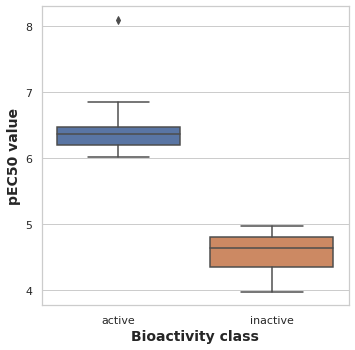

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pEC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pEC50 value', fontsize=14, fontweight='bold')

plt.savefig('./plots/pEC50_plot.pdf')

This interpretation and plot make sense since we have classified the values into different categories.

**Molecular Weight (MW)**

In [23]:
mannwhitney(df, 'MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,83.0,0.252599,0.05,Same distribution (fail to reject H0)


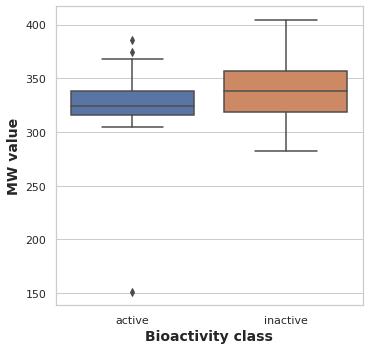

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')

plt.savefig('./plots/MW_plot.pdf')

We can see that the molecular weight fails to reject the null hypothesis as it has a very similar distribution.

**Partition Coefficient (LogP)**

In [25]:
mannwhitney(df, 'LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,89.0,0.348043,0.05,Same distribution (fail to reject H0)


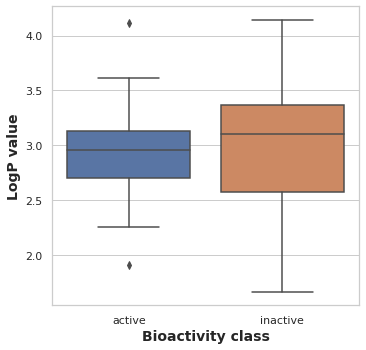

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

plt.savefig('./plots/LogP_plot.pdf')

Same as the molecular weight, the distribution of the partition coefficient is also similar between the bioactivity classes.

**Number of H$^{+}$ Donors (NumHDonors)**

In [27]:
mannwhitney(df, 'NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,56.0,0.010834,0.05,Different distribution (reject H0)


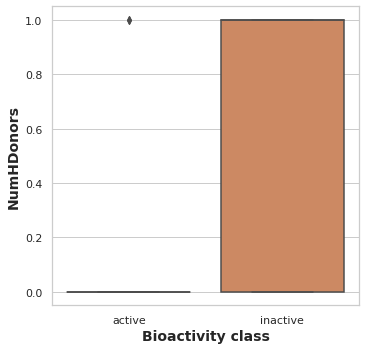

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('./plots/NumHDonors_plot.pdf')

We can see that the number of H$^{+}$ donors is binary - either 1 or 0. Judging by that, it is apparent that it rejects the null hypothesis.

**Number of H$^{+}$ Acceptors (NumHAcceptors)**

In [29]:
mannwhitney(df, 'NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,85.0,0.267215,0.05,Same distribution (fail to reject H0)


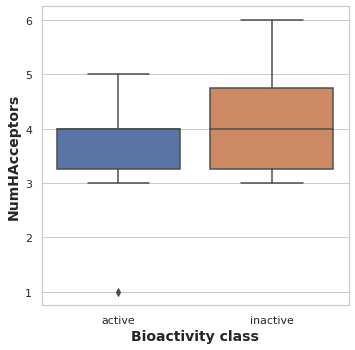

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('./plots/NumHAcceptors_plot.pdf')

#### 9.2 Interpretation of Statistical Findings  
*Box Plots*  <br> <br>
*pEC50 values*  
When analyzing the *pEC50 values*, the **active** and **inactive** displayed ***statistically significant difference***, which is expected as we bucketed them according to their *pEC50 values*.  <br><br>
*Lipinski descriptors*  
The 4 Lipinski descriptors exhibited ***statistically significant difference*** between the two bioactivity classes.

***
### Overview  
In this notebook, we have undergone the necessary steps for statistical analysis (via the **Mann-Whitney U Test**), as well as the Exploratory Data Analysis (**Chemical Space Analysis**). We have also calculated the **Lipinski descriptors** and normalized the values. In the next notebook, we will be looking into **Feature Engineering** via the chemical fingerprints of the bioactive compounds. We will also be doing **Data Preparation** for modelling later on.